In [18]:
import act
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from scipy.signal import find_peaks

In [3]:
# Set your username and token here!
username = 'gwarner'
token = '1821a4591c6fe828'

# Set the datastream and start/enddates
datastream = 'bnfdlfptM1.b1'
startdate = '2025-04-03'
enddate = '2025-04-05'

# Use ACT to easily download the data.  Watch for the data citation!  Show some support
# for ARM's instrument experts and cite their data if you use it in a publication
results_dl = act.discovery.download_arm_data(username, token, datastream, startdate, enddate)

[DOWNLOADING] bnfdlfptM1.b1.20250403.130053.cdf
[DOWNLOADING] bnfdlfptM1.b1.20250403.010053.cdf
[DOWNLOADING] bnfdlfptM1.b1.20250403.220053.cdf
[DOWNLOADING] bnfdlfptM1.b1.20250404.070053.cdf
[DOWNLOADING] bnfdlfptM1.b1.20250404.180054.cdf
[DOWNLOADING] bnfdlfptM1.b1.20250404.100053.cdf
[DOWNLOADING] bnfdlfptM1.b1.20250403.120053.cdf
[DOWNLOADING] bnfdlfptM1.b1.20250404.230053.cdf
[DOWNLOADING] bnfdlfptM1.b1.20250403.160053.cdf
[DOWNLOADING] bnfdlfptM1.b1.20250404.000053.cdf
[DOWNLOADING] bnfdlfptM1.b1.20250403.030053.cdf
[DOWNLOADING] bnfdlfptM1.b1.20250403.060053.cdf
[DOWNLOADING] bnfdlfptM1.b1.20250404.130053.cdf
[DOWNLOADING] bnfdlfptM1.b1.20250403.180053.cdf
[DOWNLOADING] bnfdlfptM1.b1.20250403.000054.cdf
[DOWNLOADING] bnfdlfptM1.b1.20250403.210053.cdf
[DOWNLOADING] bnfdlfptM1.b1.20250403.090054.cdf
[DOWNLOADING] bnfdlfptM1.b1.20250404.140053.cdf
[DOWNLOADING] bnfdlfptM1.b1.20250403.020053.cdf
[DOWNLOADING] bnfdlfptM1.b1.20250404.030053.cdf
[DOWNLOADING] bnfdlfptM1.b1.20250404.220

In [4]:
dl = act.io.read_arm_netcdf(results_dl)
dl.clean.cleanup()
dl_bs=dl['attenuated_backscatter']
bs=dl_bs.sel(time=slice('2025-04-04T00:00:00', '2025-04-04T12:00:00'))

ERROR 1: PROJ: proj_create_from_database: Open of /opt/conda/share/proj failed


In [13]:
#vertical_gradients = np.gradient(np.transpose(bs.values), axis=0)
#idx = np.argmax(np.abs(vertical_gradients), axis=0)
#PBL=bs.range.values[idx]

40897

In [21]:
pbl_height=np.zeros_like(bs[:,1])
for n in range(len(bs['time'].values)):
    peaks, _ = find_peaks(bs[n,:].values)
    pbl_height[n] = peaks[np.argmin(bs[n,:].values[peaks])]  # Min height for first peak

In [22]:
print(pbl_height)

[394. 124. 310. ... 379. 301. 205.]


/tmp/ipykernel_514/2326631790.py:5: UserWarning: Log scale: values of z <= 0 have been masked
  bs1 = plt.contourf(


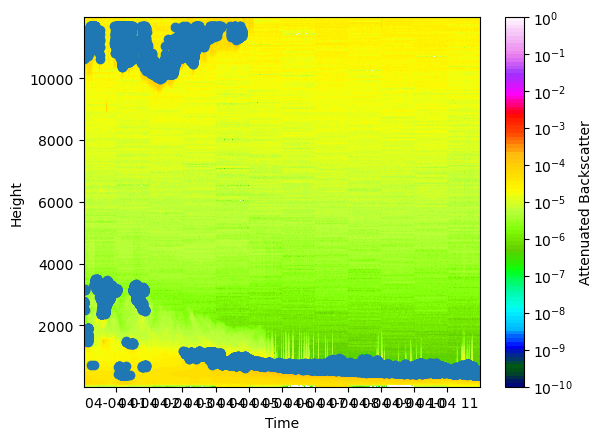

In [16]:
vmin = 1e-10
vmax = 1e0
levels = np.logspace(np.log10(vmin), np.log10(vmax), 100)
plt.figure()
bs1 = plt.contourf(
    bs['time'].values,
    bs['range'].values,
    np.transpose(bs.values),
    levels=levels,
    cmap='gist_ncar',
    norm=colors.LogNorm(vmin=vmin, vmax=vmax)
)
ticks = [10**i for i in range(-10, 1)]
plt.scatter(bs['time'].values,pbl_height)
plt.colorbar(bs1, label="Attenuated Backscatter",ticks=ticks)
plt.xlabel("Time")
plt.ylabel("Height")
plt.show()